In [1]:
# standard libraries
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal, norm
from scipy import linalg, stats
import time
import importlib

import GaussianODEs as ode
importlib.reload(ode)

<module 'GaussianODEs' from '/Users/francescacrucinio/Documents/SMC-WFR/GaussianODEs.py'>

In [2]:
mu = 1
sigma = 5
mu0 = 0
sigma0 = 1

### Infinite Time

In [3]:
discr = 100
gamma = 0.1
mean_eq_winf, var_eq_winf, kl_winf = ode.wasserstein_infinite_time(mu0, mu, sigma0, sigma, discr, gamma)
mean_eq_frinf, var_eq_frinf, kl_frinf = ode.fisherrao_infinite_time(mu0, mu, sigma0, sigma, discr, gamma)
mean_eq_wfrinf, var_eq_wfrinf, kl_wfrinf = ode.wfr_infinite_time(mu0, mu, sigma0, sigma, discr, gamma)

In [4]:
lseq_linear = np.arange(1, discr+1)/discr
alpha = 0.1
lseq_exponential = 1-np.exp(-alpha*np.arange(1, discr+1))
lseq_optimal = 1-1/(2+np.arange(1, discr+1)/sigma0)
mean_eq_tw, var_eq_tw, kl_tw = ode.tempered_wasserstein_infinite_time(mu0, mu, sigma0, sigma, discr, gamma, lseq_linear)
mean_eq_tfr, var_eq_tfr, kl_tfr = ode.tempered_fisherrao_infinite_time(mu0, mu, sigma0, sigma, discr, gamma, lseq_linear)
mean_eq_twfr, var_eq_twfr, kl_twfr = ode.tempered_wfr_infinite_time(mu0, mu, sigma0, sigma, discr, gamma, lseq_linear)

In [5]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

Text(0, 0.5, 'KL$_t$')

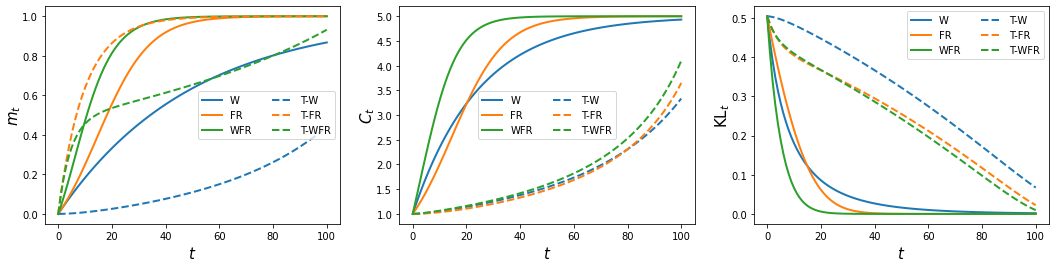

In [6]:
plt.figure(figsize = (18, 4))
plt.subplot(1, 3, 1)
plt.plot(np.arange(discr+1), mean_eq_winf, label = 'W', linestyle = 'solid', lw = 2, color = colors[0])
plt.plot(np.arange(discr+1), mean_eq_frinf, label = 'FR', linestyle = 'solid', lw = 2, color = colors[1])
plt.plot(np.arange(discr+1), mean_eq_wfrinf, label = 'WFR', linestyle = 'solid', lw = 2, color = colors[2])
plt.plot(np.arange(discr+1), mean_eq_tw, label = 'T-W', linestyle = 'dashed', lw = 2)
plt.plot(np.arange(discr+1), mean_eq_tfr, label = 'T-FR', linestyle = 'dashed', lw = 2)
plt.plot(np.arange(discr+1), mean_eq_twfr, label = 'T-WFR', linestyle = 'dashed', lw = 2)
plt.xlabel('$t$', fontsize = 15)
plt.ylabel('$m_t$', fontsize = 15, labelpad=-1)
plt.legend(ncol = 2)
plt.subplot(1, 3, 2)
plt.plot(np.arange(discr+1), var_eq_winf, label = 'W', linestyle = 'solid', lw = 2, color = colors[0])
plt.plot(np.arange(discr+1), var_eq_frinf, label = 'FR', linestyle = 'solid', lw = 2, color = colors[1])
plt.plot(np.arange(discr+1), var_eq_wfrinf, label = 'WFR', linestyle = 'solid', lw = 2, color = colors[2])
plt.plot(np.arange(discr+1), var_eq_tw, label = 'T-W', linestyle = 'dashed', lw = 2)
plt.plot(np.arange(discr+1), var_eq_tfr, label = 'T-FR', linestyle = 'dashed', lw = 2)
plt.plot(np.arange(discr+1), var_eq_twfr, label = 'T-WFR', linestyle = 'dashed', lw = 2)
plt.legend(ncol = 2)
plt.xlabel('$t$', fontsize = 15)
plt.ylabel('$C_t$', fontsize = 15, labelpad=-1)
plt.subplot(1, 3, 3)
plt.plot(np.arange(discr+1), kl_winf, label = 'W', linestyle = 'solid', lw = 2, color = colors[0])
plt.plot(np.arange(discr+1), kl_frinf, label = 'FR', linestyle = 'solid', lw = 2, color = colors[1])
plt.plot(np.arange(discr+1), kl_wfrinf, label = 'WFR', linestyle = 'solid', lw = 2, color = colors[2])
plt.plot(np.arange(discr+1), kl_tw, label = 'T-W', linestyle = 'dashed', lw = 2)
plt.plot(np.arange(discr+1), kl_tfr, label = 'T-FR', linestyle = 'dashed', lw = 2)
plt.plot(np.arange(discr+1), kl_twfr, label = 'T-WFR', linestyle = 'dashed', lw = 2)
plt.legend(ncol = 2)
plt.xlabel('$t$', fontsize = 15)
plt.ylabel('KL$_t$', fontsize = 15, labelpad=-1)
# plt.savefig('gaussian_exact2.pdf', bbox_inches="tight")